<h2>Object Identification<h2/>

In [33]:
!pip install tensorflow
!pip install ultralytics  # YOLOv8 is part of the Ultralytics package
!pip install opencv-python-headless
!pip install pillow
!pip install tesseract
!pip install easyocr
!pip install matplotlib
!pip install pandas
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.1/869.1 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 MB 18.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tesseract: filename=tesseract-0.1.3-py3-none-any.whl size=45562552 sha256=9b94745de440916d0cae94f60d4f425d176cbd683e3fa5a57d1afb86a9656d03
  Stored in directory: /root/.cache/pip/wheels/71/c9/aa/698c579693e83fdda9ad6d6f0d8f61ed986e27925ef576f109
Successfully built tesseract
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 87.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━

In [53]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import os
import json

# Load a pre-trained YOLOv8 model
segmentation_model = YOLO('yolov8n-seg.pt')  # for image segmentation
detection_model = YOLO('yolov8n.pt')         # for object detection

In [86]:
img ="/content/27DUSK1-superJumbo.jpg"

segmentation_results = det_model.predict(img,save=True,save_txt=True)
detection_results = inst_model.predict(img,save=True,save_txt=True)


# Directory to save the results and metadata
results_dir = "detection_results/"
os.makedirs(results_dir, exist_ok=True)

# Input image
img = "/content/27DUSK1-superJumbo.jpg"

# Perform object detection
detection_results = detection_model.predict(img, save=True, save_txt=True)

# Extract the result array for visualization
detection_result_array = detection_results[0].plot()


image 1/1 /content/27DUSK1-superJumbo.jpg: 448x640 9 persons, 3 cars, 2 buss, 1 truck, 1 backpack, 1 handbag, 15.2ms
Speed: 3.9ms preprocess, 15.2ms inference, 2.3ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict
2 labels saved to runs/detect/predict/labels

image 1/1 /content/27DUSK1-superJumbo.jpg: 448x640 11 persons, 4 cars, 2 buss, 1 truck, 1 backpack, 14.7ms
Speed: 3.6ms preprocess, 14.7ms inference, 3.1ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/segment/predict
2 labels saved to runs/segment/predict/labels

image 1/1 /content/27DUSK1-superJumbo.jpg: 448x640 9 persons, 3 cars, 2 buss, 1 truck, 1 backpack, 1 handbag, 7.0ms
Speed: 2.2ms preprocess, 7.0ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict4
1 label saved to runs/detect/predict4/labels


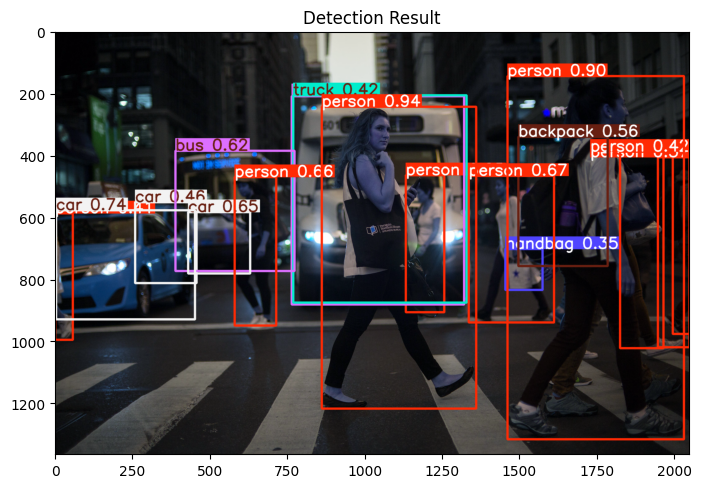

Detected a person with a confidence of 0.94.
Detected a person with a confidence of 0.90.
Detected a car with a confidence of 0.74.
Detected a person with a confidence of 0.67.
Detected a person with a confidence of 0.66.
Detected a car with a confidence of 0.65.
Detected a bus with a confidence of 0.62.
Detected a backpack with a confidence of 0.56.
Detected a car with a confidence of 0.46.
Detected a truck with a confidence of 0.42.
Detected a person with a confidence of 0.42.
Detected a person with a confidence of 0.41.
Detected a person with a confidence of 0.37.
Detected a bus with a confidence of 0.35.
Detected a handbag with a confidence of 0.35.
Detected a person with a confidence of 0.28.
Detected a person with a confidence of 0.25.
Object identification completed and metadata stored in project_root/data/detection_results/detection_metadata.json.


In [108]:
# Display detection result
fig = plt.figure(figsize=(18, 9))
ax1 = fig.add_subplot(1, 2, 2)
ax1.set_title('Detection Result')
ax1.imshow(detection_results[0].plot())
plt.show()

# Directory to store results
import os
results_dir = 'project_root/data/detection_results/'
os.makedirs(results_dir, exist_ok=True)

# Extract object classes and confidence scores
object_info_list = []
for result in detection_results:
    for box in result.boxes:
        class_id = int(box.cls)  # Class ID of detected object
        confidence = float(box.conf)  # Confidence score
        class_name = det_model.names[class_id]  # Get class name

        # Bounding box coordinates
        bbox = box.xyxy.cpu().numpy()[0]  # Bounding box coordinates

        # Create a human-readable description
        description = f"Detected a {class_name} with a confidence of {confidence:.2f}."
        print(description)

        # Append information to the list
        object_info_list.append({
            "class_id": class_id,
            "class_name": class_name,
            "confidence": confidence,
            "bbox": bbox.tolist(),
            "description": description
        })

# Save the object information as JSON metadata
metadata_path = os.path.join(results_dir, "detection_metadata.json")
with open(metadata_path, 'w') as f:
    json.dump(object_info_list, f, indent=4)

print(f"Object identification completed and metadata stored in {metadata_path}.")